# Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a dimensionality reduction technique that is widely used in machine learning. 
It is used to reduce the number of features in a dataset by projecting the data onto a lower-dimensional space. 

PCA achieves this by finding the principal components of the data, which are the directions along which the data varies the most. 

### Idea

At its core, PCA revolves around the concept of finding a new set of dimensions — called principal components — that capture the maximum variance in the data. The main goal of PCA is dimensionality reduction, which it achieves by transforming the original dataset into a set of linearly uncorrelated variables (principal components). The first principal component captures the maximum variance possible along a single axis, the second principal component captures the maximum remaining variance in a perpendicular direction to the first, and so on.

### Intuition

Imagine spreading a cloud of data points across multiple dimensions (features). Visualize these data points as existing within an n-dimensional space. PCA seeks to rotate and project these data points onto a new coordinate system (a set of axes) where the greatest variance by any projection of the data lies on the first axis (principal component), the second greatest variance on the second axis, and so forth. This results in a set of orthogonal vectors (loading vectors) that aid in descriptive and predictive modeling.

### Vector Projection

Vector Projection is a linear algebra concept that is used in PCA. It is used to project a vector onto another vector. The projection of a vector `a` onto a vector `b` is given by the formula:

$$\text{proj}_b(a) = \frac{a \cdot b}{||b||^2} \cdot b$$

where `a` is the vector to be projected and `b` is the vector onto which `a` is to be projected.

<img src="./art/vector_projection.jpg" width="40%" />

**Derivation**

Unit vector in direction of $b$ is given by:

$\hat{b} = \frac{b}{||b||}$

So projection of $a$ onto $b$, $p$ is given by:

$p = k \cdot \hat{b}$

where $k$ is the scalar projection of $a$ onto $b$. 

Now $p + c = a$ based on the triangle formed by $a$, $p$ and $c$. 

$p + c = a \rightarrow c = a - p$

Now since $c$ and $p$ are orthogonal, their dot product is zero:

$c \cdot p = 0$

Substituting $c = a - p$: and $p = k \cdot \hat{b}$:

$(a - k \cdot \hat{b}) \cdot (k \cdot \hat{b}) = 0$

$a \cdot (k \cdot \hat{b}) - k \cdot \hat{b} \cdot (k \cdot \hat{b}) = 0$

$k (a \cdot \hat{b}) - k^2 (\hat{b} \cdot \hat{b}) = 0$

Since $\hat{b} \cdot \hat{b} = 1$ as is a unit vector:

$k (a \cdot \hat{b}) - k^2 = 0$

$a \cdot \hat{b} - k = 0$

$k = a \cdot \hat{b}$

From this we have:

$p = k \hat{b} = (a \cdot \hat{b}) \hat{b} = \frac{a \cdot b}{||b||} \cdot \frac{b}{||b||} = \frac{a \cdot b}{||b||^2} \cdot b$

**Implementation:**

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def vector_projection(data, vec):
    """
    Returns the projection of data onto vec

    Parameters
    ----------
    data : np.ndarray (n, d)
        The data to project
    vec : np.ndarray (d,)
    """

    dir = vec / np.linalg.norm(vec) # b / ||b||
    # np.dot(data, dir) is same as np.sum(data * dir, axis=1), dimension (n,)
    projections = np.dot(data, dir)[:, None] * dir
    return projections

### Example of Principal Component

Let's consider a simple example to understand the concept of PCA. 

A good PCA is a vector along the direction of maximum variance. In this case it captures the most variance/information in the data.
A bad PCA is a vector along the direction of minimum variance. In this case it captures the least variance/information in the data.

Below there are components, one good and one bad. The good component captures the most variance in the data and the bad component captures the least variance in the data.

In [3]:
def scattered_dataset(n_samples=100, seed=1337):
    np.random.seed(seed)
    X1 = np.random.randn(n_samples)
    noise = np.random.normal(scale=1, size=n_samples)
    X2 = 2 * X1 + noise
    X = np.column_stack((X1, X2))
    return X

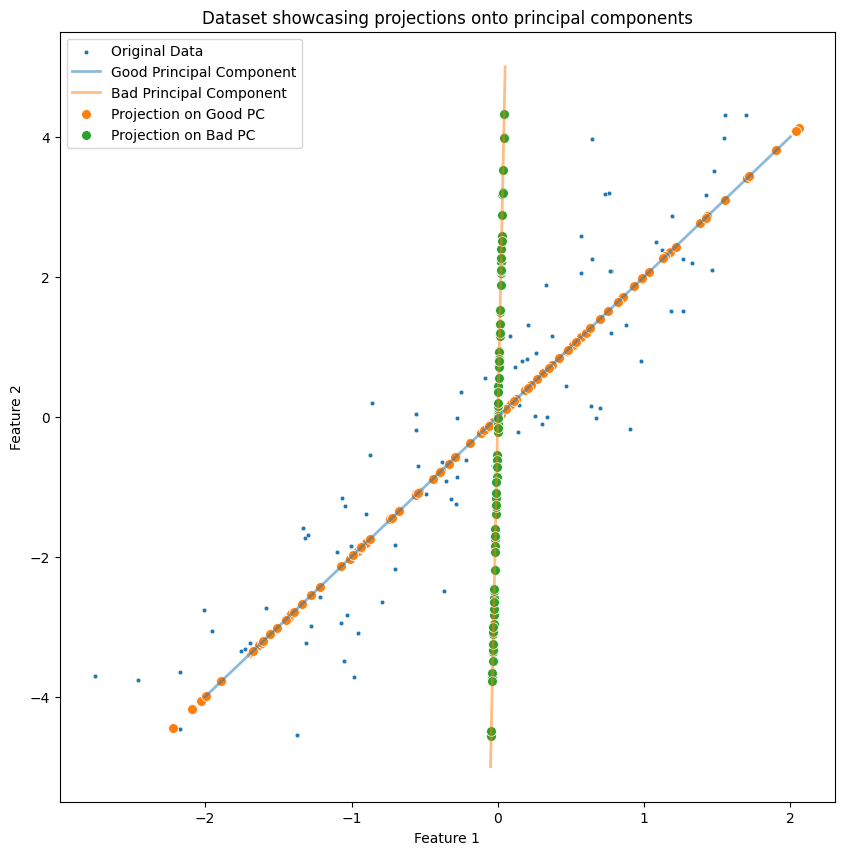

In [4]:
# Generate random data
np.random.seed(1337)
X = scattered_dataset()

# Define principal components
# s=(slope, intercept)
pc_1 = (2, 0)
pc_2 = (100, 0)

pc_1_xs = np.array([-2, 2])
pc_1_ys = pc_1_xs * pc_1[0] + pc_1[1]
pc_1_pts = np.column_stack((pc_1_xs, pc_1_ys))

pc_2_xs = np.array([-.05, .05])
pc_2_ys = pc_2_xs * pc_2[0] + pc_2[1]
pc_2_pts = np.column_stack((pc_2_xs, pc_2_ys))


X_PC_1 = vector_projection(X, pc_1_pts[0])
X_PC_2 = vector_projection(X, pc_2_pts[0])

plt.figure(figsize=(10, 10))

# Plot points
sns.scatterplot(x=X[:, 0], y=X[:, 1], label='Original Data', s=10)

# Plot the principal components
sns.lineplot(x=pc_1_pts[:, 0], y=pc_1_pts[:, 1], linewidth=2, label='Good Principal Component', alpha=0.5)
sns.lineplot(x=pc_2_pts[:, 0], y=pc_2_pts[:, 1], linewidth=2, label='Bad Principal Component', alpha=0.5)

# Plot the projections
sns.scatterplot( x=X_PC_1[:, 0], y=X_PC_1[:, 1], label='Projection on Good PC', s=50)
sns.scatterplot( x=X_PC_2[:, 0], y=X_PC_2[:, 1], label='Projection on Bad PC', s=50)

plt.title('Dataset showcasing projections onto principal components')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In this naive example, we have a dataset with two features, x and y. The principal component is the line along which the data has the maximum variance.

After this line is found, the data is projected onto it, and the new dataset is created. This new dataset has only one feature, which is the principal component.

If we choose a PCA which does not have the maximum variance, the new dataset will have a lower variance than the original dataset and will be less informative.

### Algorithm

PCA is mathematically grounded in linear algebra and involves eigenvector and eigenvalue computation. Here's how the PCA algorithm can be broken down into detailed steps:

1. **Standardize the Dataset**:
   Ensure the data is centered around the mean and scaled appropriately such that each feature contributes equally.
   
   For a dataset $X$ with $m$ samples and $n$ features, the standardized data $Z$ is calculated as:
   
   $ Z = \frac{X - \mu}{\sigma} $
   
   where $\mu$ is the mean of the dataset and $\sigma$ is the standard deviation.

2. **Compute the Covariance Matrix**:
   The covariance matrix represents how each feature of the data relates to every other feature.
   
   $ \Sigma = \frac{1}{m} Z^T Z $
   
   Here, $\Sigma$ is the $n \times n$ covariance matrix.

3. **Calculate Eigenvectors and Eigenvalues**:
   Identify the directions of maximum variance by computing the eigenvectors and eigenvalues of the covariance matrix.
   
   $ \Sigma v_i = \lambda_i v_i $
   
   Where $v_i$ are the eigenvectors and $\lambda_i$ are the corresponding eigenvalues.

4. **Sort Eigenvectors by Eigenvalues**:
   Order the eigenvectors by their corresponding eigenvalues in descending order. This ranking reflects the components that account for the most variance.

5. **Select Principal Components**:
   Choose the top $k$ eigenvectors based on the largest eigenvalues to form a matrix of principal components.
   
   $ W = [v_1, v_2, \ldots, v_k] $

6. **Transform the Original Dataset**:
   Project the original standardized data onto the new lower-dimensional space, defined by the chosen eigenvectors.
   
   $ Z_{\text{new}} = Z W $



### Covariance Matrix

The covariance matrix is a square matrix that computes the covariance between each pair of features in the dataset. It is a measure of how much two variables change together. In our case the covariance matrix would have a row for each feature and a column for each feature. The element at the $i^{th}$ row and $j^{th}$ column would be the covariance between the $i^{th}$ and $j^{th}$ features. A covariance matrix is always symmetric (ie $X^T = X$) and positive semi-definite. Positive semi-definite means that all the eigenvalues of the matrix are non-negative. The diagonal elements of the covariance matrix are the variances of the features.

The covariance between two features $x$ and $y$ is calculated as:

$$ \text{cov}(x, y) = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{n-1} $$

where $\bar{x}$ and $\bar{y}$ are the means of $x$ and $y$ respectively. Note here we divide by $n-1$ instead of $n$ to make the covariance matrix unbiased because we are estimating the population covariance from a sample and not the entire population.

**Example:**

In [5]:
import numpy as np

# Generate a random population
np.random.seed(1337)
population = np.random.normal(loc=50, scale=10, size=10000)  # Population with mean=50, std=10

# Step 2: Compute the population variance
population_variance = np.var(population)  # True variance (divided by N)

# Step 3: Sampling and variance estimation
sample_size = 30  # Size of each sample
num_samples = 1000  # Number of samples
biased_variances = []
unbiased_variances = []

for _ in range(num_samples):
    sample = np.random.choice(population, size=sample_size, replace=False)
    biased_variances.append(np.var(sample))  # Divide by n (biased)
    # ddof means Delta Degrees of Freedom. The divisor used in calculations is N - ddof, where N represents the number
    unbiased_variances.append(np.var(sample, ddof=1))  # Divide by n-1 (unbiased)

# Step 4: Compare the results
mean_biased_variance = np.mean(biased_variances)
mean_unbiased_variance = np.mean(unbiased_variances)

print("True Population Variance:", population_variance)
print("Mean of Biased Sample Variances (divided by n):", mean_biased_variance)
print("Mean of Unbiased Sample Variances (divided by n-1):", mean_unbiased_variance)
print("%% diff between true variance and biased sample variance: %.2f %%" % ((population_variance - mean_biased_variance) / population_variance * 100))
print("%% diff between true variance and unbiased sample variance: %.2f %%" % ((population_variance - mean_unbiased_variance) / population_variance * 100))


True Population Variance: 99.01058780208135
Mean of Biased Sample Variances (divided by n): 95.50242360988217
Mean of Unbiased Sample Variances (divided by n-1): 98.79561063091259
% diff between true variance and biased sample variance: 3.54 %
% diff between true variance and unbiased sample variance: 0.22 %


As you can see, the biased form underestimates the covariance of the dataset sample. The unbiased form is used in practice to estimate the covariance of the population from a sample.

Expanding the $ (x_i - \bar{x})(y_i - \bar{y}) $ term, we get:

$$ \text{cov}(x, y) = \frac{\sum_{i=1}^{n} x_i y_i - x_i \bar{y} - y_i \bar{x} + \bar{x} \bar{y}}{n-1} $$

$$ \text{cov}(x, y) = \frac{1}{n-1} \left( \sum_{i=1}^{n} x_i y_i - \bar{y} \sum_{i=1}^{n} x_i - \bar{x} \sum_{i=1}^{n} y_i + n \bar{x} \bar{y} \right) $$

Since $ \bar{x} = \frac{\sum_{i=1}^{n} x_i}{n} $ and $ \bar{y} = \frac{\sum_{i=1}^{n} y_i}{n} $ and $ \bar{x \cdot y} = \frac{\sum_{i=1}^{n} x_i y_i}{n} $
, we can rewrite the equation as:

$$ \text{cov}(x, y) = \frac{1}{n-1} \left( n \bar{x \cdot y} - \bar{y} n \bar{x} - \bar{x} n \bar{y} + n \bar{x} \bar{y} \right) $$

$$ \text{cov}(x, y) = \bar{x \cdot y} - \bar{x} \cdot \bar{y} $$

This can be written in matrix form as:

$$ \Sigma = \frac{1}{n-1} Z^T Z $$

where $Z$ is $ X - \mu $ and $\mu$ is the mean of the dataset.

**Implementation:**

In [6]:
def covar(X):
    """
    Returns the covariance matrix of X

    Parameters
    ----------
    X : np.ndarray (n, d)
        The data matrix
    """

    n = X.shape[0]
    X = X - X.mean(axis=0)  # Center the data
    return X.T @ X / (n - 1)

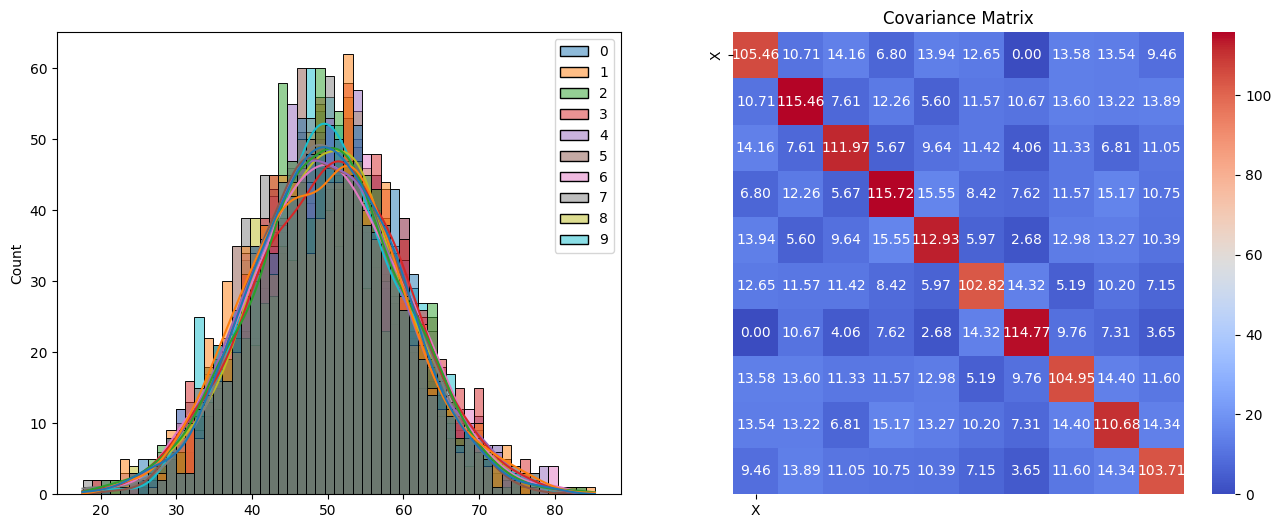

In [7]:
data = np.random.normal(loc=50, scale=10, size=(1000, 10))

X = np.c_[data]

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax = ax.flatten()

sns.histplot(X, kde=True, ax=ax[0])
plt.title('Histogram of the population')
plt.xlabel('Value')
plt.ylabel('Frequency')

X_centered = X - np.mean(X)
Cov = covar(X_centered)

# Base at 0 for better plotting
Cov = Cov - np.min(Cov)

sns.heatmap(Cov, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=['X'], yticklabels=['X'], ax=ax[1])
plt.title('Covariance Matrix')
plt.show()

### Eigen Decomposition

References: 
- [3Blue1Brown: The determinant](https://www.youtube.com/watch?v=Ip3X9LOh2dk)
- [3Blue1Brown: Eigenvectors and eigenvalues](https://www.youtube.com/watch?v=PFDu9oVAE-g)
- [Eigen Decomposition Wikipedia](https://en.wikipedia.org/wiki/Eigendecomposition_of_a_matrix)
- [Finding eigenvalues: The power method](https://services.math.duke.edu/~jtwong/math361-2019/lectures/Lec10eigenvalues.pdf)

Eigen decomposition is a process by which a square matrix is decomposed into a set of eigenvectors and eigenvalues. The eigenvectors are the directions along which the data varies the most, and the eigenvalues are the magnitudes of the variance in these directions. Eigen vectors are unit vectors, which means their magnitude is 1 and they are orthogonal to each other. So a matrix of size $n \times n$ will have $n$ eigen vectors and $n$ eigen values, the maximum number of eigen vectors is equal to the number of features in the dataset.

The eigen decomposition of a matrix $A$ is given by:

$$ A v = \lambda v $$

where $v$ is the eigenvector and $\lambda$ is the eigenvalue and $A$ is the matrix to be decomposed.

$ A v = \lambda v $

$ A v - \lambda I v = 0 $, where $I$ is the identity matrix.

$ (A - \lambda I) v = 0 $

Since we know that $v$ is not zero, the matrix $A - \lambda I$ must have a solution in its null-space which is a non-zero vector $v$. This means the matrix $A - \lambda I$ is non-invertible, and as a property of non-invertible matrices, the determinant of the matrix is zero.

$ \text{det}(A - \lambda I) = 0 $

using the determinant, we can form equations to solve for possible values of $\lambda$. It will be a polynomial of degree $n$ where $n$ is the size of the matrix.

Once we have the eigenvalues, we can substitute them back into the equation $ A v = \lambda v $ to get the eigenvectors.

**Deriving Eigenvalues and Eigenvectors**

Deriving the eigenvalues and eigenvectors is not a trivial task and involves solving a polynomial equation of n-th degree. The general form of the equation is:


#### Power iteration method

The simplest method of finding the eigenvalues is to use the **Power iteration method**. The power iteration method is an iterative method that finds the eigenvector corresponding to the largest eigenvalue of a matrix. The method is based on the fact that if you multiply a vector by a matrix repeatedly, it will converge to the eigenvector corresponding to the largest eigenvalue.

**Derivation**

Consider a matrix $ A $ with eigenvalues $ \lambda_1, \lambda_2, \dots, \lambda_n $ such that $ |\lambda_1| > |\lambda_2| \geq |\lambda_3| \geq \cdots \geq |\lambda_n| $. Let the corresponding eigenvectors be $ v_1, v_2, \dots, v_n $.

If the initial random vector $ b^{(0)} $ can be expressed as a linear combination of the eigenvectors:

$ b^{(0)} = c_1 v_1 + c_2 v_2 + \cdots + c_n v_n $

Then applying the matrix $ A $ repeatedly to $ b^{(0)} $ gives:

$ b^{(1)} = A \cdot b^{(0)} $
$ = A \cdot (c_1 v_1 + c_2 v_2 + \cdots + c_n v_n) $
$ = c_1 A v_1 + c_2 A v_2 + \cdots + c_n A v_n $

Now since $ v_i $ are eigenvectors of $ A $, $ A v_i = \lambda_i v_i $. We now have

$ b^{(1)} = c_1 \lambda_1 v_1 + c_2 \lambda_2 v_2 + \cdots + c_n \lambda_n v_n $

Similarly

$ b^{(2)} = A \cdot b^{(1)} $

$ = A \cdot (c_1 \lambda_1 v_1 + c_2 \lambda_2 v_2 + \cdots + c_n \lambda_n v_n) $

$ = c_1 \lambda_1 A v_1 + c_2 \lambda_2 A v_2 + \cdots + c_n \lambda_n A v_n $

$ = c_1 \lambda_1^2 v_1 + c_2 \lambda_2^2 v_2 + \cdots + c_n \lambda_n^2 v_n $


Generalizing,

$ b^{(k)} = c_1 \lambda_1^k v_1 + c_2 \lambda_2^k v_2 + \cdots + c_n \lambda_n^k v_n $

**Normalization**

To prevent numerical overflow and improve convergence stability, the vector is typically normalized at each iteration:
$$ b^{(k+1)} = \frac{A b^{(k)}}{\|A b^{(k)}\|} $$


**Eigenvalue**

As $ k $ increases, $ \lambda_1^k $ will dominate the expression because $ |\lambda_1| > |\lambda_i| $ for all $ i \geq 2 $. If $ c_1 \neq 0 $, the vector $ b^{(k)} $ will become approximately proportional to $ \lambda_1^k v_1 $. Normalizing $ b^{(k)} $ helps in isolating the direction aspect, bringing it closer to $ v_1 $.

Next, we calculate the eigenvalue $ \lambda_1 $ using the Rayleigh quotient:

$ A v = \lambda v $

$ v^T A v = v^T \lambda v $

$ v^T A v = \lambda v^T v $

Now since both sides are scaler values, we can write:

$ \lambda = \frac{v^T A v}{v^T v} \approx \frac{b^{(k)T} A b^{(k)}}{b^{(k)T} b^{(k)}} $

This is the Rayleigh quotient, which is used to approximate the eigenvalue $ \lambda_1 $.

**Implementation:**

In [8]:
def power_iteration(A, max_iter=1000, tol=1e-6):
    assert A.ndim == 2, 'Input matrix must be 2D'
    n, m = A.shape
    assert n == m, 'Input matrix must be square'

    # Step 1: Generate a random vector of size n
    b = np.random.rand(n)

    # Step 2: Iterate until convergence
    for _ in range(max_iter):
        # Step 3: Compute the matrix-by-vector product Ab
        b_new = np.dot(A, b)
        # Step 4: Compute the norm
        b_new = b_new / np.linalg.norm(b_new)  # Normalize the vector

        # Step 5: Check for convergence
        if np.linalg.norm(b - b_new) < tol:
            break

        # Step 6: Update the vector
        b = b_new

    # b is now the first eigenvector

    # Step 5: Compute the eigenvalue using Rayleigh quotient
    eig_val = np.dot(b, np.dot(A, b)) / np.dot(b, b)

    return eig_val, b

First Principal Component: [0.39831332 0.91724942] 5.622396299668944


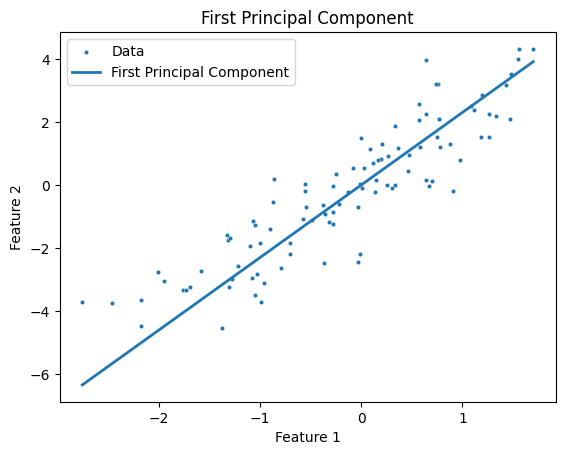

In [9]:
X = scattered_dataset()
Cov = covar(X)
eig_val, eig_vec = power_iteration(Cov)

print("First Principal Component:", eig_vec, eig_val)

def plot_eig_vec(eig, min_x, max_x, title=''):
    slope = eig[1] / eig[0]
    min_y = slope * min_x
    max_y = slope * max_x
    sns.lineplot(x=[min_x, max_x], y=[min_y, max_y], label=title, linewidth=2)

min_x = np.min(X[:, 0])
max_x = np.max(X[:, 0])

sns.scatterplot(x=X[:, 0], y=X[:, 1], label='Data', s=10)
plot_eig_vec(eig_vec, min_x, max_x, title='First Principal Component')
plt.title('First Principal Component')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

This method works on any size matrix and is easy to implement. However, it is slow and may not converge for some matrices.

#### Deflation method

The **Deflation method** is a method to find all eigenvalues and eigenvectors of a matrix using power iteration. The method is based on the fact that if you have found an eigenvector of a matrix, you can deflate the matrix by subtracting the outer product of the eigenvector from the matrix. This will remove the eigenvector from the matrix and you can find the next eigenvector.

**Derivation**

Consider a matrix $ A $ with eigenvalues $ \lambda_1, \lambda_2, \dots, \lambda_n $ such that $ |\lambda_1| > |\lambda_2| \geq |\lambda_3| \geq \cdots \geq |\lambda_n| $. Let the corresponding eigenvectors be $ v_1, v_2, \dots, v_n $.

Also let's assume that we have found the eigenvector $ v_1 $ corresponding to the eigenvalue $ \lambda_1 $. Now we can deflate the matrix $ A $ by subtracting the outer product of $ v_1 $ from $ A $.

Now there is a new matrix $ A' $ which is the deflated matrix of $ A $, ie, $ A' v_1 = 0 $. (This is because the eigenvector $ v_1 $ is removed from the matrix $ A $).

$ A' v_1 = 0 = \lambda_1 v_1 - \lambda_1 v_1 $

Now we know that $A v_1 = \lambda_1 v_1$. Also $v_1^T v_1 = 1$ because $v_1$ is a unit vector.

$ A' v_1 = A v_1 - \lambda_1 v_1 v_1^T v_1 $

As matrix multiplication is associative, we can write:

$ A' v_1 = ( A - \lambda_1 v_1 v_1^T ) v_1 $

$ A' = A - \lambda_1 v_1 v_1^T $

This new matrix $ A' $ is the deflated matrix of $ A $ and it has the eigenvalues $ \lambda_2, \lambda_3, \dots, \lambda_n $ and the eigenvectors $ v_2, v_3, \dots, v_n $.


**Implementation:**

In [10]:
# def power_iteration_deflated(A, max_iter=1000, tol=1e-6):
#     eig_vals, eig_vecs, matrices = [], [], [A.copy()]

#     while len(eig_vals) < A.shape[0]:
#         val, vec = power_iteration(A, max_iter, tol)
#         eig_vals.append(val)
#         eig_vecs.append(vec)
#         A = A - val * vec @ vec.T
#         matrices.append(A.copy())

#     return np.array(eig_vals), np.array(eig_vecs), matrices

def power_iteration_deflated(A, max_iter=1000, tol=1e-6):
    A_original = A.copy()
    eig_vals, eig_vecs, matrices = [], [], [A_original.copy()]

    for _ in range(A.shape[0]):
        # Work with original matrix
        A_current = A_original.copy()

        # Deflate using all previously found eigenvectors
        for j in range(len(eig_vecs)):
            v = eig_vecs[j]
            A_current = A_current - (eig_vals[j] * np.outer(v, v))

        val, vec = power_iteration(A_current, max_iter, tol)
        eig_vals.append(val)
        eig_vecs.append(vec)
        matrices.append(A_current.copy())

    return np.array(eig_vals), np.array(eig_vecs), matrices

[[ 0.39831332  0.91724942]
 [ 0.91724895 -0.3983144 ]]


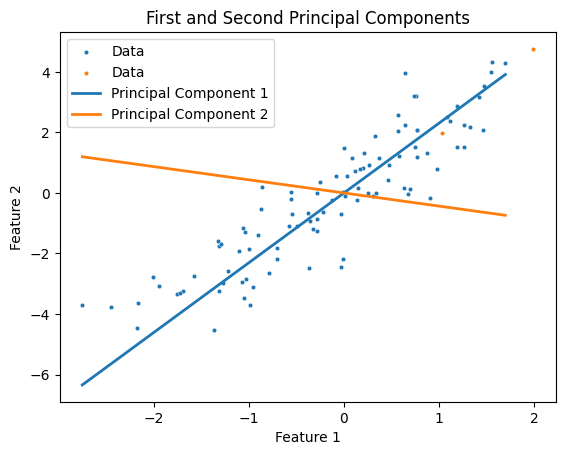

In [12]:
X = scattered_dataset()
Cov = covar(X)
eig_vals, eig_vecs, XS = power_iteration_deflated(Cov)
slopes = eig_vecs[:, 1] / eig_vecs[:, 0]

print(eig_vecs)

xs = [np.min(X[:, 0]), np.max(X[:, 0])]

sns.scatterplot(x=X[:, 0], y=X[:, 1], label='Data', s=10)
sns.scatterplot(x=XS[1][:, 0], y=XS[1][:, 1], label='Data', s=10)
for i, eig_vec in enumerate(eig_vecs):
    plot_eig_vec(eig_vec, *xs, title=f'Principal Component {i + 1}')
plt.title('First and Second Principal Components')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

**Limitations:**
- The power iteration method is slow and may not converge for some matrices.
- The deflation method is also slow and may not converge for some matrices.
- The power iteration method is not guaranteed to converge to the largest eigenvalue if the matrix is not symmetric.
- The deflation method is not guaranteed to find all eigenvalues and eigenvectors if the matrix is not symmetric.
- All the eigenvalues and eigenvectors are not guaranteed to be real or unique or orthogonal.

### QR Decomposition

References:
- [QR Decomposition Wikipedia](https://en.wikipedia.org/wiki/QR_decomposition)
- [MIT OCW](https://www.youtube.com/watch?v=d32WV1rKoVk)
- [UCLA: QR Decomposition with Gram-Schmidt](https://www.math.ucla.edu/~yanovsky/Teaching/Math151B/handouts/GramSchmidt.pdf)
- [The Bright Side of Mathematics: QR Decomp](https://www.youtube.com/watch?v=FAnNBw7d0vg)

QR decomposition is a process by which a matrix is decomposed into an orthogonal matrix $Q$ and an upper triangular matrix $Q$. The QR decomposition of a matrix $A$ is given by:

$$ A = Q R $$

Here A is a square matrix of size $n \times n$, which is the covariance matrix in our case.

QR decomposition process involves finding $Q$ and $R$ matrices and then construction a new matrix $A_1$ from them, $A_1 = RQ$. This new matrix has the same eigenvalues as the original matrix $A$. Since Q is orthogonal, $ Q^T Q = I $, ie $ Q^T = Q^{-1} $.

$ A = Q R $ so $ R = Q^{-1} A $

Now $ A_1 = RQ = Q^{-1} A Q = Q^T A Q $

Since orthogonal transformations are similarity transformations, they preserve the eigenvalues of the matrix being transformed. The purpose of this iterative process is to converge $ A_k $ to an upper triangular matrix, where the eigenvalues (which are the same as the original matrix) appear on the diagonal. This convergence to an upper triangular form occurs under suitable conditions, such as the matrix having distinct eigenvalues.



<img src="./art/qr_decomp_1.jpg" width="49%" /> <img src="./art/qr_decomp_2.jpg" width="49%" />

Consider the matrix:

$$ A = \begin{bmatrix} a_{11} & a_{12} & a_{13} \\ a_{21} & a_{22} & a_{23} \\ a_{31} & a_{32} & a_{33} \end{bmatrix} = \begin{bmatrix} | & | & | \\ a_1 & a_2 & a_3 \\ | & | & | \end{bmatrix} $$

We aim to express this as $ A = QR $. Where every column of $ Q $ is orthogonal and $ R $ is upper triangular. Where 

$$ Q = \begin{bmatrix} | & | & | \\ q_1 & q_2 & q_3 \\ | & | & | \end{bmatrix}, R = \begin{bmatrix} r_{11} & r_{12} & r_{13} \\ r_{21} & r_{22} & r_{23} \\ r_{31} & r_{32} & r_{33} \end{bmatrix} $$


**Apply Gram-Schmidt Process**:
1.  Start with $ a_1 $.
1.  Normalize $ a_1 $ to get $ q_1 $:
    $$ q_1 = \frac{a_1}{\|a_1\|} $$
1.  Compute $ a_2 $'s component orthogonal to $ q_1 $:
  
    Now to get vector $ q_2 $ which orthogonal to $q1$ we use the same idea as vector projection above where $c$ was $orthogonal to $p$ and $p$ was the projection of $a$ onto $b$. Here $a_2$ is the vector and $q_1$ is the vector onto which $a_2$ is to be projected. 
  
    $ u_2 = a_2 - (a_2 \cdot q_1) q_1 $, where $ (a_2 \cdot q_1) $ is the length of projection of $a_2$ onto $q_1$.
  
    Now $ q_2 = \frac{u_2}{\|u_2\|} $ is the vector orthogonal to $q_1$.

    Similarly for $ a_3 $:

    $ u_3 = a_3 - (a_3 \cdot q_1) q_1 - (a_3 \cdot q_2) q_2 $

    $ q_3 = \frac{u_3}{\|u_3\|} $

1.  Now for $ R $, we have:

    $ a_1 = r_{11} q_1 + r_{21} q_2 + r_{31} q_3 $

    And since $ a_1 = \|a_1\| q_1 $, we haveL $ r_{11} = \|a_1\| $ and $ r_{21} = r_{31} = 0 $

    Similarly for $ a_2 $:

    $ a_2 = r_{12} q_1 + r_{22} q_2 + r_{32} q_3 $

    And since $ u_2 = a_2 - (a_2 \cdot q_1) q_1 $, we have $ r_{12} = (a_2 \cdot q_1) $ and $ r_{22} = \|u_2\| $ and $ r_{32} = 0 $


    Similarly for $ a_3 $:

    $ a_3 = r_{13} q_1 + r_{23} q_2 + r_{33} q_3 $

    And since $ u_3 = a_3 - (a_3 \cdot q_1) q_1 - (a_3 \cdot q_2) q_2 $, we have $ r_{13} = (a_3 \cdot q_1) $, $ r_{23} = (a_3 \cdot q_2) $ and $ r_{33} = \|u_3\| $   


1. **Initialize**:
   - Start with $ Q = 0_{n \times n} $ and $ R = 0_{n \times n} $.

2. **For each column $ j $ (from 0 to $ n-1 $) of $ A $:**

   - **Start with**:
     $$ \mathbf{v}_j = \mathbf{a}_j $$
     where $ \mathbf{a}_j $ is the $ j $-th column vector of $ A $.

   - **Orthogonalize**:
     For each $ i $ (from 0 to $ j-1 $):
     $$ R_{i, j} = \mathbf{q}_i^T \mathbf{a}_j $$
     $$ \mathbf{v}_j = \mathbf{v}_j - R_{i, j} \mathbf{q}_i $$
     Here, $ \mathbf{q}_i $ is the $ i $-th column vector of $ Q $.

   - **Normalize**:
     $$ R_{j, j} = \| \mathbf{v}_j \| $$
     $$ \mathbf{q}_j = \frac{\mathbf{v}_j}{R_{j, j}} $$
     where $ \| \cdot \| $ denotes the Euclidean norm (i.e., the length of the vector).

3. **Repeat** for all columns until $ j = n-1 $.

### Datasets

### SKlearn

### Implementation


### Conclusion

### PCA vs t-SNE

PCA and t-SNE are both dimensionality reduction techniques, but they serve different purposes. 

**PCA (Principal Component Analysis)**

- **Linear Dimensionality Reduction**: PCA is a linear technique that transforms the data into a lower-dimensional space by finding directions (principal components) that maximize variance.
- **Large Data Handling**: PCA can handle large datasets efficiently, especially when using techniques like Singular Value Decomposition (SVD).
- **Interpretability**: The principal components in PCA are linear combinations of the original features and are therefore easy to interpret.
- **Computational Speed**: Typically faster to compute than t-SNE, especially for large datasets.
- **Global Structure Preservation**: Captures the global variance in the data, representing the overall data structure.
- **Output**: Produces an exact transformation and is deterministic, meaning the same input will always result in the same output.

**t-SNE (t-Distributed Stochastic Neighbor Embedding)**

- **Non-linear Dimensionality Reduction**: t-SNE is a non-linear technique, effective for visualizing intricate local structures in high-dimensional data in a lower-dimensional space.
- **Visual Exploration**: Particularly suited for creating a 2D or 3D map of complex high-dimensional data, often revealing clusters or groupings.
- **Local Structure Emphasis**: Focuses on maintaining local neighbor relationships rather than global data structure.
- **Computationally Intensive**: More computationally demanding and slower compared to PCA, especially on large datasets.
- **Non-deterministic Output**: Results can vary with different random initializations unless seeded for consistency.
- **Hyperparameter Sensitivity**: Requires careful tuning of hyperparameters like perplexity for optimal results, and different settings can lead to significantly different visual outcomes.
